<a href="https://colab.research.google.com/github/Skshamim02/BERT-based-TwitterMood/blob/main/Multinomial_Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


# Get the file from the  Google Drive
file_path = '/content/labeled_tweets_dataset.csv'

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1')



In [5]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [6]:
# Replace the sentiment strings with numerical codes
sentiment_mapping = {'neutral': 0, 'positive': 2, 'negative': 1}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


In [7]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11226 non-null  int64 
 1   user                11226 non-null  object
 2   tweet               10855 non-null  object
 3   preprocessed_tweet  10318 non-null  object
 4   sentiment           11226 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 438.6+ KB


In [9]:
df = df[['preprocessed_tweet','sentiment']]

In [10]:
df


,preprocessed_tweet,sentiment
0,former minister shahbaz sharif cabinet pledged...,0
1,catastrophe house border life america american...,1
2,man abhishekja98788 using dp name elonmusk twi...,0
3,inside elon musk neuralink lab animal killed t...,1
4,apology accountability broke law,0
...,...,...
11221,elonmusk crazy thing say,1
11222,start thread posting spam account blocked cait...,0
11223,lot easier rely traitorous elon musk,0
11224,elonmusk groq grok,0


In [11]:
text_len = []
for text in df.preprocessed_tweet:
    if isinstance(text, str):  # Check if the value is a string
        tweet_len = len(text.split())
        text_len.append(tweet_len)
    else:
        text_len.append(0)  # Or handle the NaN/float case as needed, e.g., append 0 or None


In [12]:
df['text_len'] = text_len

<ipython-input-12-5bfdd5f14fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = text_len


In [13]:
text_len

[25,
 14,
 11,
 12,
 4,
 0,
 48,
 15,
 3,
 15,
 3,
 3,
 1,
 1,
 36,
 5,
 184,
 17,
 28,
 13,
 1,
 9,
 8,
 6,
 5,
 77,
 6,
 0,
 26,
 8,
 5,
 37,
 26,
 0,
 20,
 9,
 23,
 22,
 4,
 19,
 9,
 14,
 20,
 1,
 2,
 1,
 24,
 53,
 11,
 0,
 27,
 19,
 27,
 23,
 23,
 16,
 9,
 10,
 0,
 2,
 2,
 11,
 0,
 6,
 4,
 15,
 25,
 17,
 13,
 0,
 16,
 9,
 8,
 27,
 2,
 17,
 3,
 3,
 8,
 9,
 27,
 9,
 0,
 5,
 19,
 9,
 0,
 2,
 25,
 3,
 3,
 12,
 20,
 20,
 7,
 5,
 3,
 5,
 0,
 33,
 43,
 16,
 18,
 30,
 25,
 19,
 5,
 6,
 25,
 1,
 3,
 27,
 21,
 19,
 1,
 0,
 4,
 2,
 16,
 15,
 2,
 6,
 2,
 40,
 0,
 44,
 2,
 9,
 27,
 2,
 1,
 5,
 4,
 19,
 6,
 34,
 3,
 4,
 15,
 9,
 7,
 19,
 10,
 10,
 13,
 19,
 9,
 2,
 6,
 5,
 1,
 4,
 5,
 12,
 5,
 14,
 6,
 12,
 4,
 14,
 38,
 18,
 18,
 13,
 0,
 111,
 2,
 32,
 8,
 12,
 22,
 7,
 16,
 17,
 4,
 2,
 3,
 8,
 4,
 4,
 4,
 8,
 14,
 9,
 20,
 18,
 7,
 22,
 3,
 4,
 1,
 21,
 19,
 23,
 2,
 1,
 18,
 4,
 0,
 3,
 22,
 20,
 2,
 7,
 3,
 0,
 2,
 6,
 8,
 2,
 2,
 8,
 7,
 2,
 24,
 17,
 3,
 31,
 9,
 18,
 20,
 1,
 2,
 22,
 3

In [14]:
text_len_test = []
for text in df.preprocessed_tweet:
    if isinstance(text, str):  # Check if the value is indeed a string
        tweet_len = len(text.split())
    else:
        tweet_len = 0  # Assign 0 or any appropriate value for non-string values
    text_len_test.append(tweet_len)


In [15]:
df['text_len'] = text_len_test

<ipython-input-16-137fc67924ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[df['text_len']<40], palette='mako')


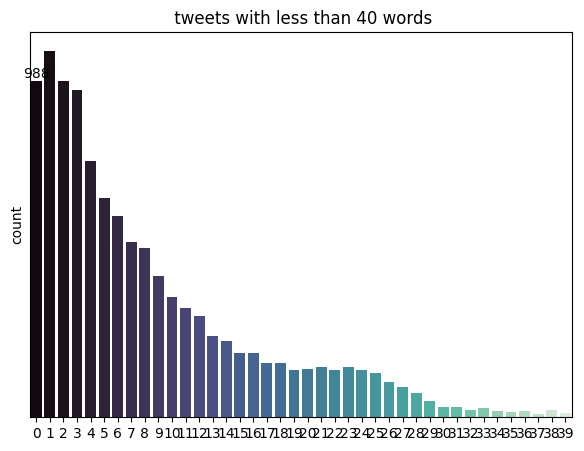

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your plotting code here
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<40], palette='mako')
plt.title(' tweets with less than 40 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [17]:
#As we can see, there are lots of cleaned tweets with 0 words: this is due to the cleaning performed before.
# This means that some tweets contained only mentions, hashtags and links, which have been removed. We will drop these empty tweets and also those with less than 5 words.

In [18]:
print(f" DF SHAPE: {df.shape}")


 DF SHAPE: (11226, 3)


In [19]:
df = df[df['text_len'] > 3]

In [20]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (7213, 3)


In [21]:
!pip install transformers

In [22]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
import numpy as np

In [24]:
token_lens = []

for txt in df['preprocessed_tweet'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [25]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 512


In [26]:
token_lens = []

for i,txt in enumerate(df['preprocessed_tweet'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 10, TEXT: judge kathaleen mccormick rescinded elon musk 55 billion tesla compensation package overturning company board 80 shareholder mccormick also ruled elonmusk twitter acquisition becoming head delaware chancery court mccormick worked delaware law firm called young conaway firm employee major donor president joe biden decade 2016 hunter biden hosted gubernatorial campaign event congressman john carney president joe biden guest speaker event took place law office young conaway wilmington delaware carney close friend joe biden last four decade later became governor nominated kathaleen mccormick partner young conaway position delaware chancery court march 2018 email hunter biden claimed personally know every judge delaware chancery court threatening legal action chinese business partner bring suit chancery court delaware know home state privileged worked know every judge chancery court elon musk purchased twitter stated goal restoring president biden called federal investigati

In [27]:
df['token_lens'] = token_lens

<ipython-input-27-b06175d1d9b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_lens'] = token_lens


In [28]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,preprocessed_tweet,sentiment,text_len,token_lens
9555,musk anuncia primeiro implante chip neuralink ...,1,301,512
5358,matteo gracis qualche giorno fa attraverso x o...,2,315,512
6542,probably doubt need evidence system john adam ...,2,494,512
420,delaware ruling elon musk 55b comp package big...,2,550,512
8549,want know happening elon musk company today go...,2,890,512
2735,regulamentao da big tech j est acontecendo com...,2,218,441
4434,ellon musk act move tesla legal base texas jud...,2,291,353
6310,horizon scan ep 32 musk renumeration v decel c...,1,265,335
1236,point think pro 1 tax benefit texas offer favo...,2,285,300
8746,palestine never existed independent state army...,2,279,296


In [29]:
df = df.iloc[12:]
df.head()

,preprocessed_tweet,sentiment,text_len,token_lens
1515,elonmusk judge kathaleen mccormick rescinded e...,2,186,235
16,judge kathaleen mccormick rescinded elon musk ...,2,184,225
3157,delaware chancery court chief judge kathaleen ...,2,192,224
8374,terzaketv gaat het bij het hersenimplantaat va...,0,98,214
8270,circle 1 1 sovmichael 2 conceptualjames 3 jaco...,0,92,211


In [30]:
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
df

,preprocessed_tweet,sentiment,text_len,token_lens
0,hate humanity disguise virtue texas much bette...,2,9,12
1,yes agree elon musk say window opportunity ope...,0,9,13
2,great work thanks elon musk,2,5,9
3,u civil war dichotomy since latinamerica still...,2,16,24
4,deny guaranteed accepting blame dna,0,5,7
...,...,...,...,...
7196,salut elonmusk x faire quelque chose pour mieu...,0,41,80
7197,elonmusk elon help please,0,4,10
7198,big isi magazine khurasan thre ten hindu bhara...,1,46,72
7199,elon go dual citizenship,0,4,7


In [32]:
df_test= df.sample(frac=1).reset_index(drop=True)

In [33]:
df_test

,preprocessed_tweet,sentiment,text_len,token_lens
0,hayrdr olum uzayn tapusunu mu aldn amck elonmusk,0,8,24
1,frustrating invasion continues unabated happen...,2,20,26
2,please provide source state personal relations...,0,14,16
3,hate x elonmusk seems created hybrid competiti...,1,29,39
4,dude suit brought forward shareholder,0,5,7
...,...,...,...,...
7196,believe people support terrorism hamas rather ...,1,16,18
7197,reasoning real reason behind medium outrage de...,1,21,24
7198,like flower kerrikgray elonmusk tonyadevitti,0,5,16
7199,abbot republican playing politics immigrant bo...,2,16,18


In [34]:

df['sentiment'].value_counts()

2    2801
0    2735
1    1665
Name: sentiment, dtype: int64

In [35]:
X = df_test['preprocessed_tweet'].values
y = df_test['sentiment'].values

In [36]:
pip install imbalanced-learn


In [37]:
from imblearn.over_sampling import RandomOverSampler

# Now you can use RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['preprocessed_tweet']).reshape(-1, 1), np.array(df['sentiment']).reshape(-1, 1))
df_test = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns=['preprocessed_tweet', 'sentiment'])


In [38]:
from sklearn.model_selection import train_test_split

# Define a seed for reproducibility
seed = 42

# Now, use this seed in train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)



In [39]:
X_test = df['preprocessed_tweet'].values
y_test = df['sentiment'].values

In [40]:
y_test

array([2, 0, 2, ..., 1, 0, 1])

In [41]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [42]:
from sklearn import preprocessing

# Now you can use preprocessing.OneHotEncoder
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
# Assuming y_test is defined
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()


In [43]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 6480
VALIDATION DATA: 721
TESTING DATA: 7201


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Now you can use CountVectorizer
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

# Now you can use TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)


In [46]:
from sklearn.naive_bayes import MultinomialNB

# Now you can instantiate and use MultinomialNB
nb_clf = MultinomialNB()


In [47]:
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

In [54]:
nb_pred = nb_clf.predict(X_test_tf)

In [55]:
from sklearn.metrics import classification_report

# predictions and test labels respectively
print('\tClassification Report for Naive Bayes:\n\n', classification_report(y_test_le, nb_pred, target_names=['Negative', 'Neutral', 'Positive']))


	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.95      0.70      0.81      2735
     Neutral       0.98      0.36      0.53      1665
    Positive       0.61      0.98      0.75      2801

    accuracy                           0.73      7201
   macro avg       0.84      0.68      0.70      7201
weighted avg       0.82      0.73      0.72      7201



In [56]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
nb_cm = confusion_matrix(y_test_le, nb_pred)

# Display the confusion matrix
print("Confusion Matrix for Naive Bayes:\n", nb_cm)


Confusion Matrix for Naive Bayes:
 [[1925    4  806]
 [  72  603  990]
 [  39    6 2756]]


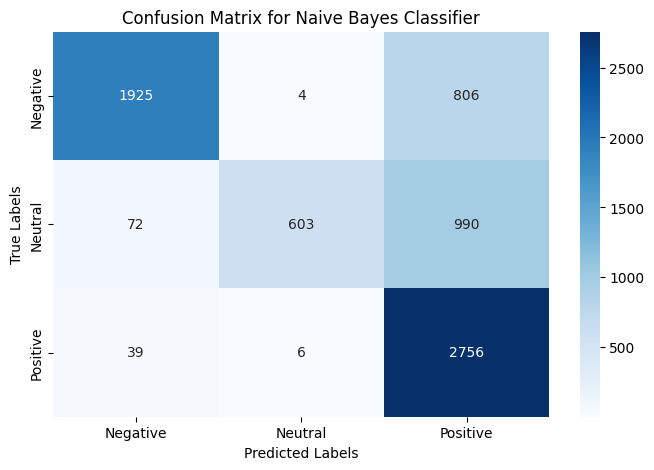

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_le, nb_pred)

# Plot the confusion matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


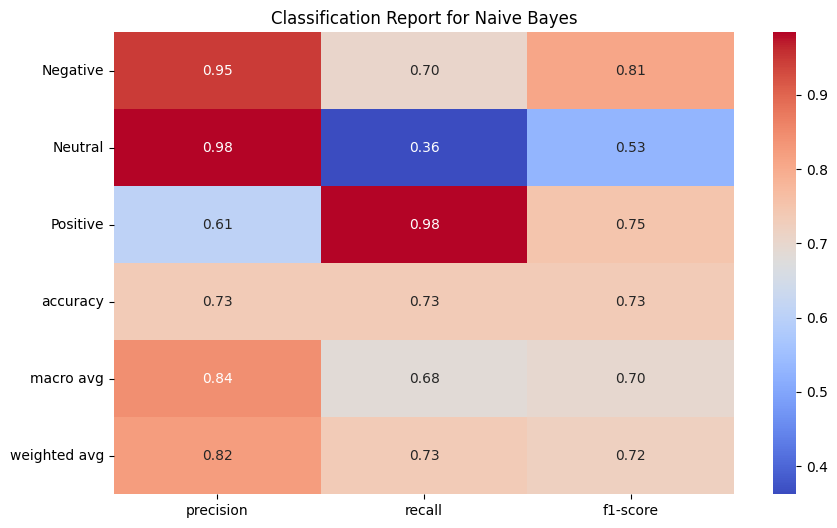

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# pedictions and test labels respectively
report = classification_report(y_test_le, nb_pred, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)

# Convert the report dictionary to a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Remove the 'support' column if you don't want to visualize it
report_df = report_df.drop('support', axis=1)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report for Naive Bayes')
plt.show()
